In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [6]:
file1 = 'queue_data.csv'
data = pd.read_csv(file1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  560 non-null    object 
 1   start_time    560 non-null    object 
 2   finish_time   560 non-null    object 
 3   wait_time     560 non-null    float64
 4   queue_length  560 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


In [8]:
import pandas as pd

# Assuming data is your DataFrame
# Display the column names to verify their correctness
print("Column Names:", data.columns)

# Convert the 'arrival_time' and 'start_time' columns to datetime with specified format
data['arrival_time'] = pd.to_datetime(data['arrival_time'], format='%d-%m-%Y %H.%M')
data['start_time'] = pd.to_datetime(data['start_time'], format='%d-%m-%Y %H.%M')

# Calculate the waiting time as the difference between 'start_time' and 'arrival_time'
data['waiting_time'] = (data['start_time'] - data['arrival_time']).dt.total_seconds()

# Verify the results
print(data[['arrival_time', 'start_time', 'waiting_time']].head())

Column Names: Index(['arrival_time', 'start_time', 'finish_time', 'wait_time',
       'queue_length'],
      dtype='object')
         arrival_time          start_time  waiting_time
0 2023-03-30 00:10:00 2023-03-30 00:10:00           0.0
1 2023-03-30 00:10:00 2023-03-30 00:16:00         360.0
2 2023-03-30 00:10:00 2023-03-30 00:16:00         360.0
3 2023-03-30 00:10:00 2023-03-30 00:14:00         240.0
4 2023-03-30 00:10:00 2023-03-30 00:15:00         300.0


In [9]:
# Convert 'wait_time' to numeric, coercing errors to NaN
df['waiting_time'] = pd.to_numeric(df['wait_time'], errors='coerce')

# Drop rows with NaN values in 'waiting_time'
df = df.dropna(subset=['waiting_time'])

In [10]:
# Convert 'waiting_time' to numeric, coercing errors to NaN
df['waiting_time'] = pd.to_numeric(df['waiting_time'], errors='coerce')

# Drop rows with NaN values in 'waiting_time'
df = df.dropna(subset=['waiting_time'])

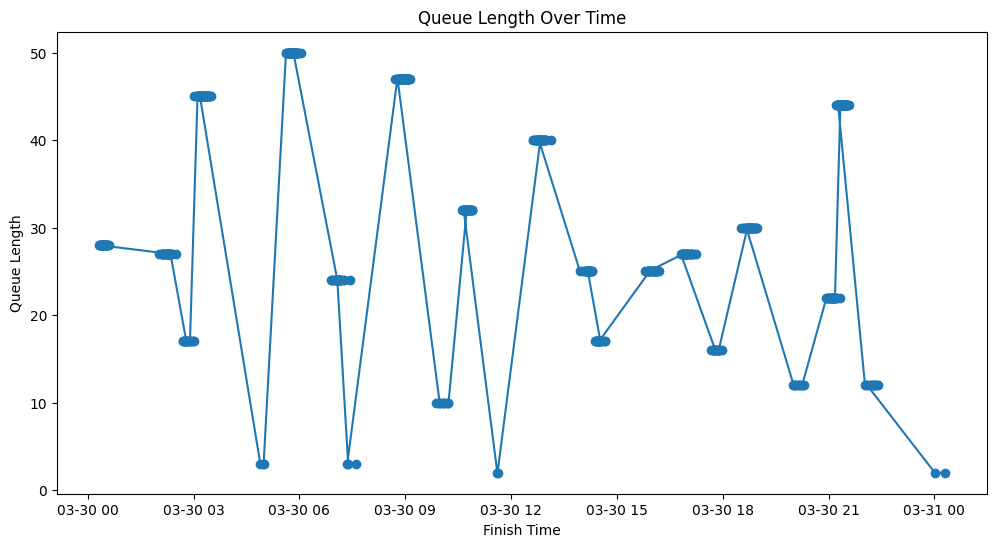

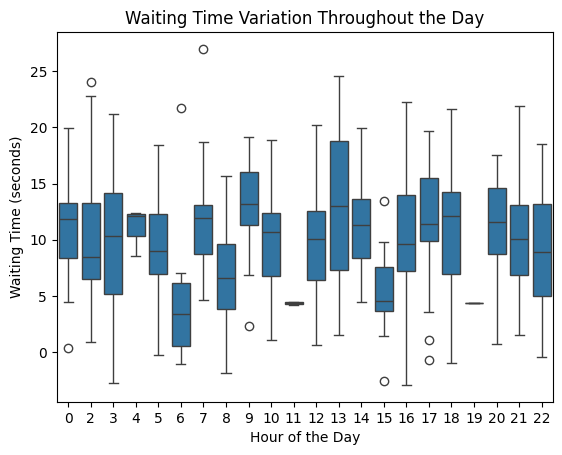

In [11]:
# Convert 'finish_time' to datetime
df['finish_time'] = pd.to_datetime(df['finish_time'])

# Plot queue length over time
plt.figure(figsize=(12, 6))
plt.plot(df['finish_time'], df['queue_length'], marker='o', linestyle='-')
plt.title('Queue Length Over Time')
plt.xlabel('Finish Time')
plt.ylabel('Queue Length')
plt.show()

# Analyze waiting time variation throughout the day
df['hour'] = df['finish_time'].dt.hour
sns.boxplot(x='hour', y='waiting_time', data=df)
plt.title('Waiting Time Variation Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Waiting Time (seconds)')
plt.show()

In [12]:
# Descriptive statistics
stats = df.describe()
print(stats)

                         finish_time   wait_time  queue_length  waiting_time  \
count                            560  560.000000    560.000000    560.000000   
mean   2023-03-30 11:29:43.021071360   10.107911     32.132143     10.107911   
min       2023-03-30 00:19:27.400000   -2.930000      2.000000     -2.930000   
25%    2023-03-30 05:46:51.750000128    6.527500     24.750000      6.527500   
50%              2023-03-30 10:49:47   10.120000     30.000000     10.120000   
75%       2023-03-30 17:08:23.300000   13.322500     45.000000     13.322500   
max       2023-03-31 00:17:23.200000   26.980000     50.000000     26.980000   
std                              NaN    5.032406     12.418048      5.032406   

             hour  
count  560.000000  
mean    10.887500  
min      0.000000  
25%      5.000000  
50%     10.000000  
75%     17.000000  
max     22.000000  
std      6.760391  


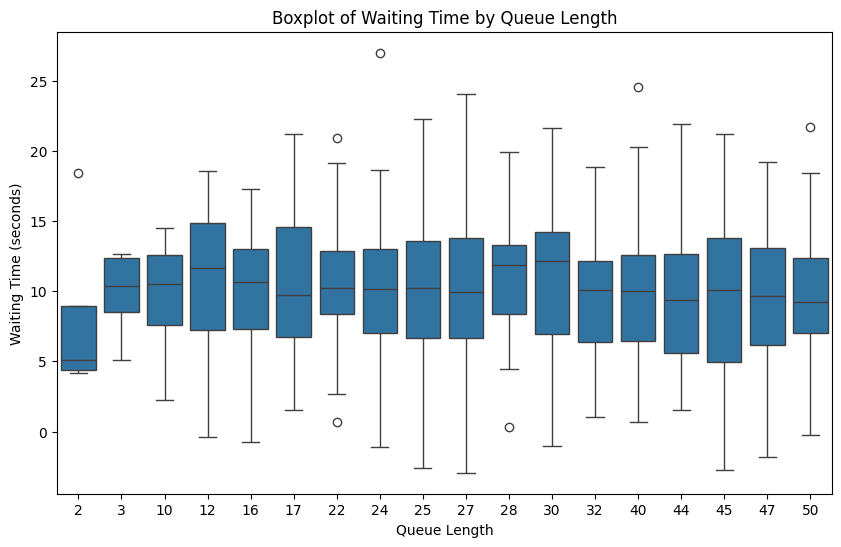

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['queue_length'], y=df['waiting_time'])
plt.title('Boxplot of Waiting Time by Queue Length')
plt.xlabel('Queue Length')
plt.ylabel('Waiting Time (seconds)')
plt.show()


arrival_time            object
start_time              object
finish_time     datetime64[ns]
wait_time              float64
queue_length             int64
waiting_time           float64
hour                     int32
dtype: object


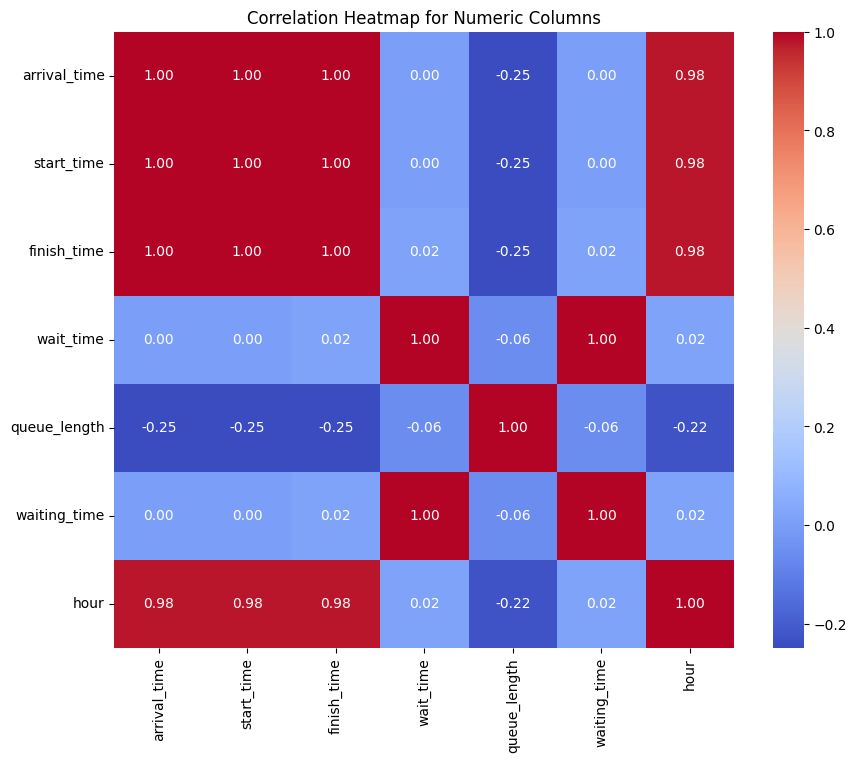

In [14]:
# Check the data types of each column
print(df.dtypes)

# Convert non-numeric columns to numeric, coercing errors to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Specify the format for 'arrival_time' and 'start_time'
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%d-%m-%Y %H.%M')
df['start_time'] = pd.to_datetime(df['start_time'], format='%d-%m-%Y %H.%M')

# Correlation matrix for numeric columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

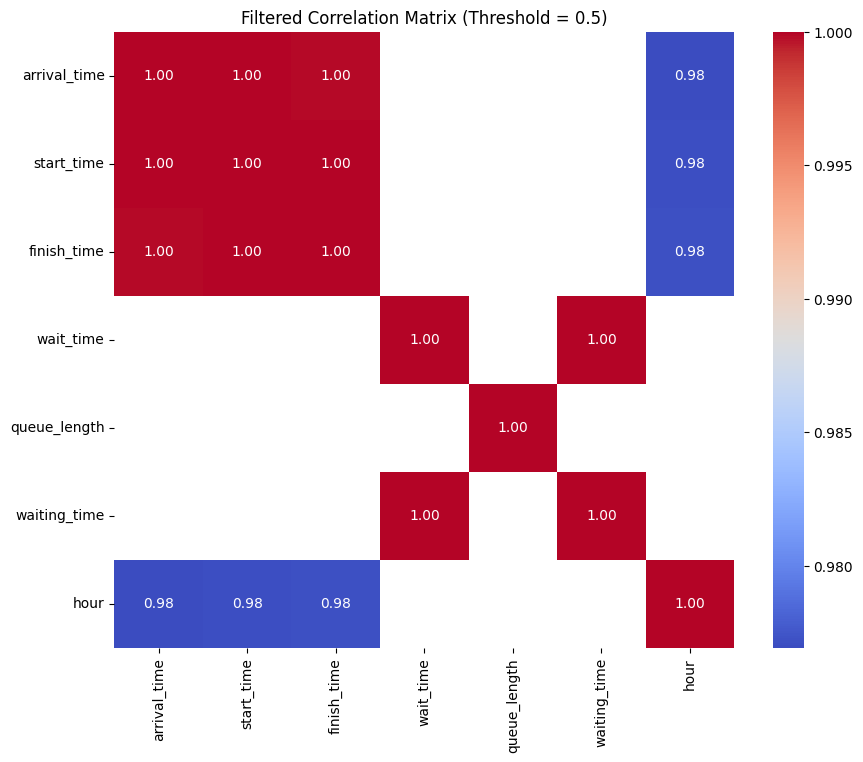

In [15]:
# Specify the correlation threshold
correlation_threshold = 0.5  # You can adjust this value based on your preference

# Filter the correlation matrix
filtered_correlation_matrix = correlation_matrix[abs(correlation_matrix) > correlation_threshold]

# Plot the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Filtered Correlation Matrix (Threshold = {correlation_threshold})")
plt.show()

Highly Correlated Variable Pairs:
              arrival_time  start_time  finish_time  wait_time  queue_length  \
arrival_time         False        True         True      False         False   
start_time            True       False         True      False         False   
finish_time           True        True        False      False         False   
wait_time            False       False        False      False         False   
queue_length         False       False        False      False         False   
waiting_time         False       False        False      False         False   
hour                  True        True         True      False         False   

              waiting_time   hour  
arrival_time         False   True  
start_time           False   True  
finish_time          False   True  
wait_time            False  False  
queue_length         False  False  
waiting_time         False  False  
hour                 False  False  


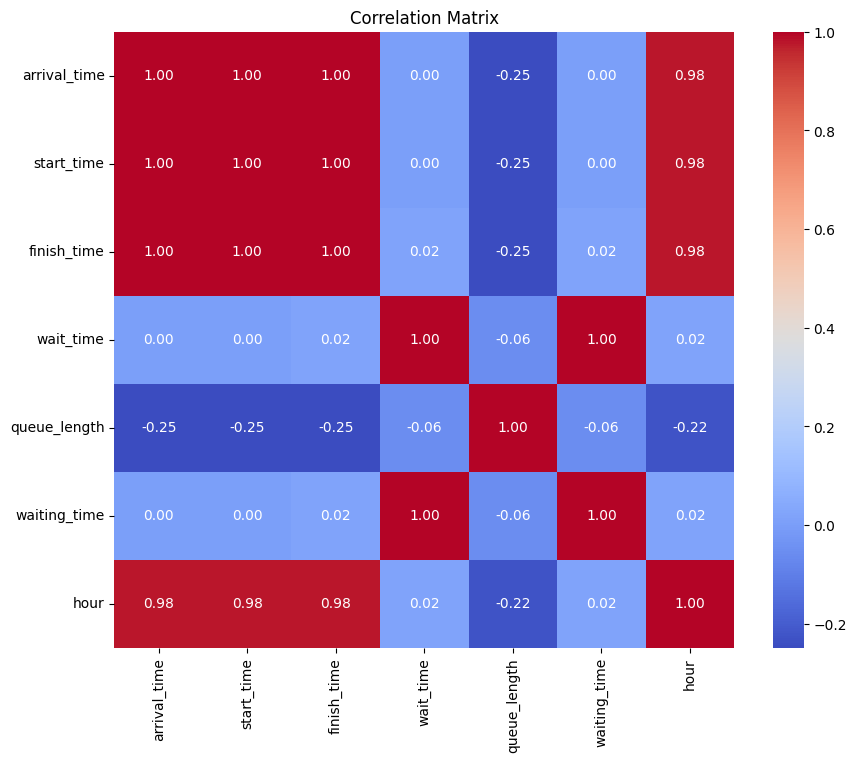

In [16]:
# Specify a high correlation threshold
high_correlation_threshold = 0.9  # You can adjust this value based on your preference

# Find highly correlated pairs
highly_correlated_pairs = (abs(correlation_matrix) > high_correlation_threshold) & (correlation_matrix < 1.0)

# Display highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(highly_correlated_pairs)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [17]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [18]:
# Select relevant columns for the VAR model
columns_for_var = ['arrival_time', 'start_time', 'finish_time', 'wait_time', 'queue_length', 'waiting_time', 'hour']
df_var = df[columns_for_var]


In [19]:
# Train-test split
train_size = int(len(df_var) * 0.8)
train, test = df_var.iloc[:train_size, :], df_var.iloc[train_size:, :]
print(train.dtypes)

arrival_time    datetime64[ns]
start_time      datetime64[ns]
finish_time     datetime64[ns]
wait_time              float64
queue_length             int64
waiting_time           float64
hour                     int32
dtype: object


In [20]:
print(train.isnull().sum())

arrival_time    0
start_time      0
finish_time     0
wait_time       0
queue_length    0
waiting_time    0
hour            0
dtype: int64


In [21]:
print(train.applymap(np.isreal))

     arrival_time  start_time  finish_time  wait_time  queue_length  \
0            True        True         True       True          True   
1            True        True         True       True          True   
2            True        True         True       True          True   
3            True        True         True       True          True   
4            True        True         True       True          True   
..            ...         ...          ...        ...           ...   
443          True        True         True       True          True   
444          True        True         True       True          True   
445          True        True         True       True          True   
446          True        True         True       True          True   
447          True        True         True       True          True   

     waiting_time  hour  
0            True  True  
1            True  True  
2            True  True  
3            True  True  
4            True

/var/folders/gm/nwrwwdzx4r710xtdn1bb69w80000gn/T/ipykernel_1914/1549938833.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(train.applymap(np.isreal))


In [22]:
def datetime_transform(X):
    return X.values.reshape(-1, 1)  # Convert datetime to a 2D array

In [23]:
train_array = np.asarray(train.dropna())  # Remove rows with missing values

In [24]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def datetime_transform(X):
    return X.values.reshape(-1, 1)  # Convert datetime to a 2D array

datetime_transformer = FunctionTransformer(datetime_transform, validate=False)

In [25]:
def create_dataset(dataset, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        data_X.append(a)
        data_Y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_Y)

Epoch 1/100


/Users/cydniena/Documents/GitHub/RestaurantQueueingSystem/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


447/447 - 1s - 1ms/step - loss: 0.0464
Epoch 2/100
447/447 - 0s - 319us/step - loss: 0.0292
Epoch 3/100
447/447 - 0s - 314us/step - loss: 0.0287
Epoch 4/100
447/447 - 0s - 316us/step - loss: 0.0285
Epoch 5/100
447/447 - 0s - 315us/step - loss: 0.0285
Epoch 6/100
447/447 - 0s - 317us/step - loss: 0.0284
Epoch 7/100
447/447 - 0s - 314us/step - loss: 0.0284
Epoch 8/100
447/447 - 0s - 319us/step - loss: 0.0286
Epoch 9/100
447/447 - 0s - 314us/step - loss: 0.0284
Epoch 10/100
447/447 - 0s - 314us/step - loss: 0.0283
Epoch 11/100
447/447 - 0s - 316us/step - loss: 0.0283
Epoch 12/100
447/447 - 0s - 315us/step - loss: 0.0284
Epoch 13/100
447/447 - 0s - 319us/step - loss: 0.0283
Epoch 14/100
447/447 - 0s - 314us/step - loss: 0.0287
Epoch 15/100
447/447 - 0s - 318us/step - loss: 0.0284
Epoch 16/100
447/447 - 0s - 315us/step - loss: 0.0284
Epoch 17/100
447/447 - 0s - 323us/step - loss: 0.0284
Epoch 18/100
447/447 - 0s - 316us/step - loss: 0.0285
Epoch 19/100
447/447 - 0s - 316us/step - loss: 0.02

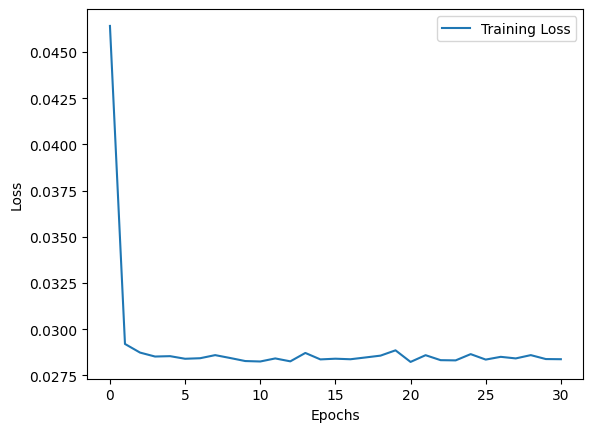

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Mean Squared Error (MSE) on Test Data: 26.290974455006076


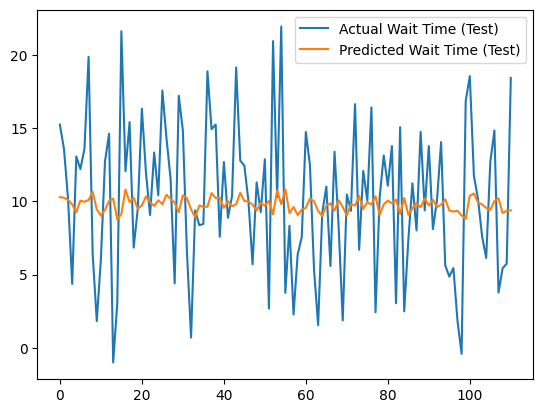

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train' is your training set
train_features = train[['wait_time']].values.astype(float)

# Apply Min-Max scaling to the training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_features_scaled = scaler.fit_transform(train_features)

# Create the training dataset with look back
look_back = 1
train_X, train_y = create_dataset(train_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1)

# Train the model
history = model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2, callbacks=[early_stopping])

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Assuming 'test' is your test set
test_features = test[['wait_time']].values.astype(float)

# Apply Min-Max scaling to the test data
test_features_scaled = scaler.transform(test_features)

# Create the test dataset with look back
test_X, test_y = create_dataset(test_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Make predictions on the test set
test_predict = model.predict(test_X)

# Inverse transform the predictions to the original scale
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Calculate MSE
mse = mean_squared_error(test_y.flatten(), test_predict.flatten())
print(f'Mean Squared Error (MSE) on Test Data: {mse}')

# Plot the results
plt.plot(test_y.flatten(), label='Actual Wait Time (Test)')
plt.plot(test_predict.flatten(), label='Predicted Wait Time (Test)')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step


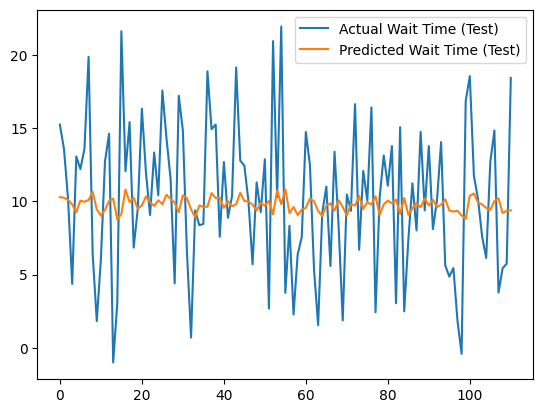

In [27]:
# Assuming 'test' is your test set
test_features = test[['wait_time']].values.astype(float)
test_features_scaled = scaler.transform(test_features)

# Create the test dataset with look back
test_X, test_y = create_dataset(test_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Make predictions on the test set
test_predict = model.predict(test_X)

# Inverse transform the predictions to the original scale
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Plot the results
plt.plot(test_y.flatten(), label='Actual Wait Time (Test)')
plt.plot(test_predict.flatten(), label='Predicted Wait Time (Test)')
plt.legend()
plt.show()

In [28]:
# Assuming 'test' is your test set
test_features = test[['wait_time']].values.astype(float)
test_features_scaled = scaler.transform(test_features)

# Create the test dataset with look back
test_X, test_y = create_dataset(test_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Make predictions on the test set
test_predict = model.predict(test_X)

# Inverse transform the predictions to the original scale
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Print the actual and predicted values
print("Actual Wait Time (Test):", test_y.flatten())
print("Predicted Wait Time (Test):", test_predict.flatten())


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
Actual Wait Time (Test): [15.23 13.56 10.13  4.36 13.06 12.2  13.6  19.86  6.38  1.82  6.05 12.72
 14.61 -1.    3.05 21.61 12.05 15.4   6.84  9.49 16.32 11.93  9.06 13.33
 10.41 17.56 14.31 11.54  4.4  17.2  14.83  6.5   0.7   9.38  8.37  8.45
 18.87 14.92 15.24  7.58 12.68  8.87 10.37 19.13 12.78 12.43 10.01  5.7
 11.29  9.26 12.87  2.68 20.93 10.29 21.93  3.75  8.33  2.27  6.36  7.56
 14.73 12.47  5.33  1.55  9.2  11.    5.58 13.38  8.26  1.87 10.46  9.35
 16.63  6.69 12.07 10.06 16.41  2.42 10.24 13.13 11.07 13.77  3.04 15.06
  2.49  7.35 11.23  8.01 14.74  9.38 13.77  8.1  10.09 14.04  5.63  4.86
  5.44  1.82 -0.41 16.84 18.54 11.74 10.16  7.6   6.13 12.68 14.83  3.77
  5.43  5.74 18.42]
Predicted Wait Time (Test): [10.285373  10.238131  10.088776   9.779797   9.254144  10.043918
  9.96661   10.092362  10.648091   9.438928   9.020775   9.4087925
 10.013376  10.182769   8.760517   9.133919  10.801338   9.953107
 10.253293   9.480896   9.721837 

Epoch 1/50


/Users/cydniena/Documents/GitHub/RestaurantQueueingSystem/.conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 - 1s - 48ms/step - loss: 0.1769 - val_loss: 0.1194
Epoch 2/50
14/14 - 0s - 3ms/step - loss: 0.0722 - val_loss: 0.0333
Epoch 3/50
14/14 - 0s - 3ms/step - loss: 0.0343 - val_loss: 0.0323
Epoch 4/50
14/14 - 0s - 3ms/step - loss: 0.0302 - val_loss: 0.0316
Epoch 5/50
14/14 - 0s - 3ms/step - loss: 0.0300 - val_loss: 0.0305
Epoch 6/50
14/14 - 0s - 3ms/step - loss: 0.0299 - val_loss: 0.0305
Epoch 7/50
14/14 - 0s - 3ms/step - loss: 0.0296 - val_loss: 0.0304
Epoch 8/50
14/14 - 0s - 3ms/step - loss: 0.0298 - val_loss: 0.0304
Epoch 9/50
14/14 - 0s - 3ms/step - loss: 0.0298 - val_loss: 0.0304
Epoch 10/50
14/14 - 0s - 4ms/step - loss: 0.0296 - val_loss: 0.0303
Epoch 11/50
14/14 - 0s - 4ms/step - loss: 0.0295 - val_loss: 0.0303
Epoch 12/50
14/14 - 0s - 3ms/step - loss: 0.0294 - val_loss: 0.0302
Epoch 13/50
14/14 - 0s - 4ms/step - loss: 0.0294 - val_loss: 0.0302
Epoch 14/50
14/14 - 0s - 4ms/step - loss: 0.0298 - val_loss: 0.0302
Epoch 15/50
14/14 - 0s - 4ms/step - loss: 0.0294 - val_loss: 0.0301

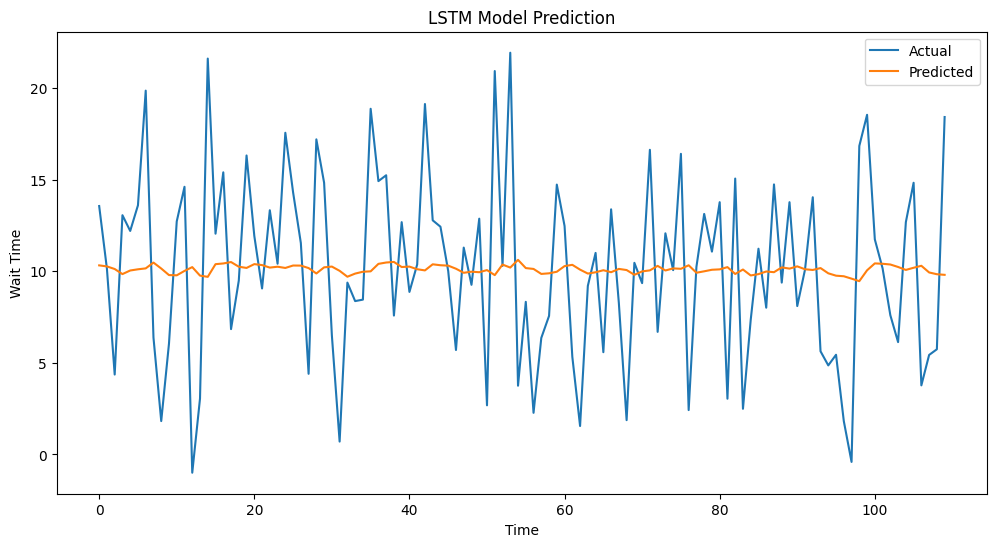

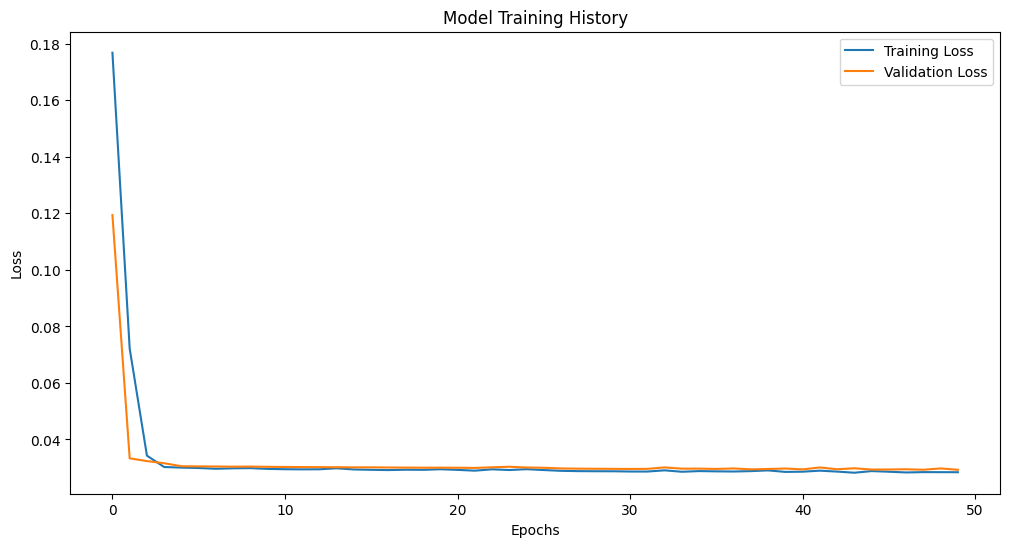

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with a datetime index
df['timestamp'] = pd.to_datetime(df['finish_time'])
df.set_index('timestamp', inplace=True)

# Feature scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['wait_time']])

# Create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 10

# Create sequences and labels
X, y = create_sequences(df_scaled, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint], verbose=2)

# Load the best model
best_model = load_model('best_model.keras')

# Make predictions
y_pred = best_model.predict(X_test)

# Inverse transform the scaled predictions and labels
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('LSTM Model Prediction')
plt.xlabel('Time')
plt.ylabel('Wait Time')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()